In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,cv
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [45]:
df_data = pd.read_csv('/content/dataset.csv')

In [46]:
print('shape of the df', df_data.shape)
df_data.head()

shape of the df (11055, 32)


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


In [47]:
df_data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.656897,0.165084,0.869380,0.850294,0.870737,0.132519,0.040525,0.467119,0.331615,0.814292,...,0.806694,0.908458,0.530620,0.688557,0.295070,0.258164,0.860787,-0.163275,0.859792,0.556943
std,0.474767,0.402826,0.336999,0.356799,0.335506,0.339070,0.833195,0.678297,0.470815,0.388888,...,0.394909,0.288392,0.499084,0.463104,0.820263,0.437644,0.346184,0.961174,0.347218,0.496769
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#identify the type of data in each column
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

In [49]:
df_data.shape

(11055, 32)

In [50]:
df_data = df_data.drop('index',axis=1)

In [51]:
df_data.nunique()

,0
having_IPhaving_IP_Address,2
URLURL_Length,3
Shortining_Service,2
having_At_Symbol,2
double_slash_redirecting,2
Prefix_Suffix,2
having_Sub_Domain,3
SSLfinal_State,3
Domain_registeration_length,2
Favicon,2


In [52]:
#check for NULL value in the dataset
df_data.isnull().sum().sum()

np.int64(0)

In [53]:
# NULL value check
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [54]:
# Duplicate check
df1 = df_data.T
print(df1.duplicated().sum()) # there is no duplicate column values

0


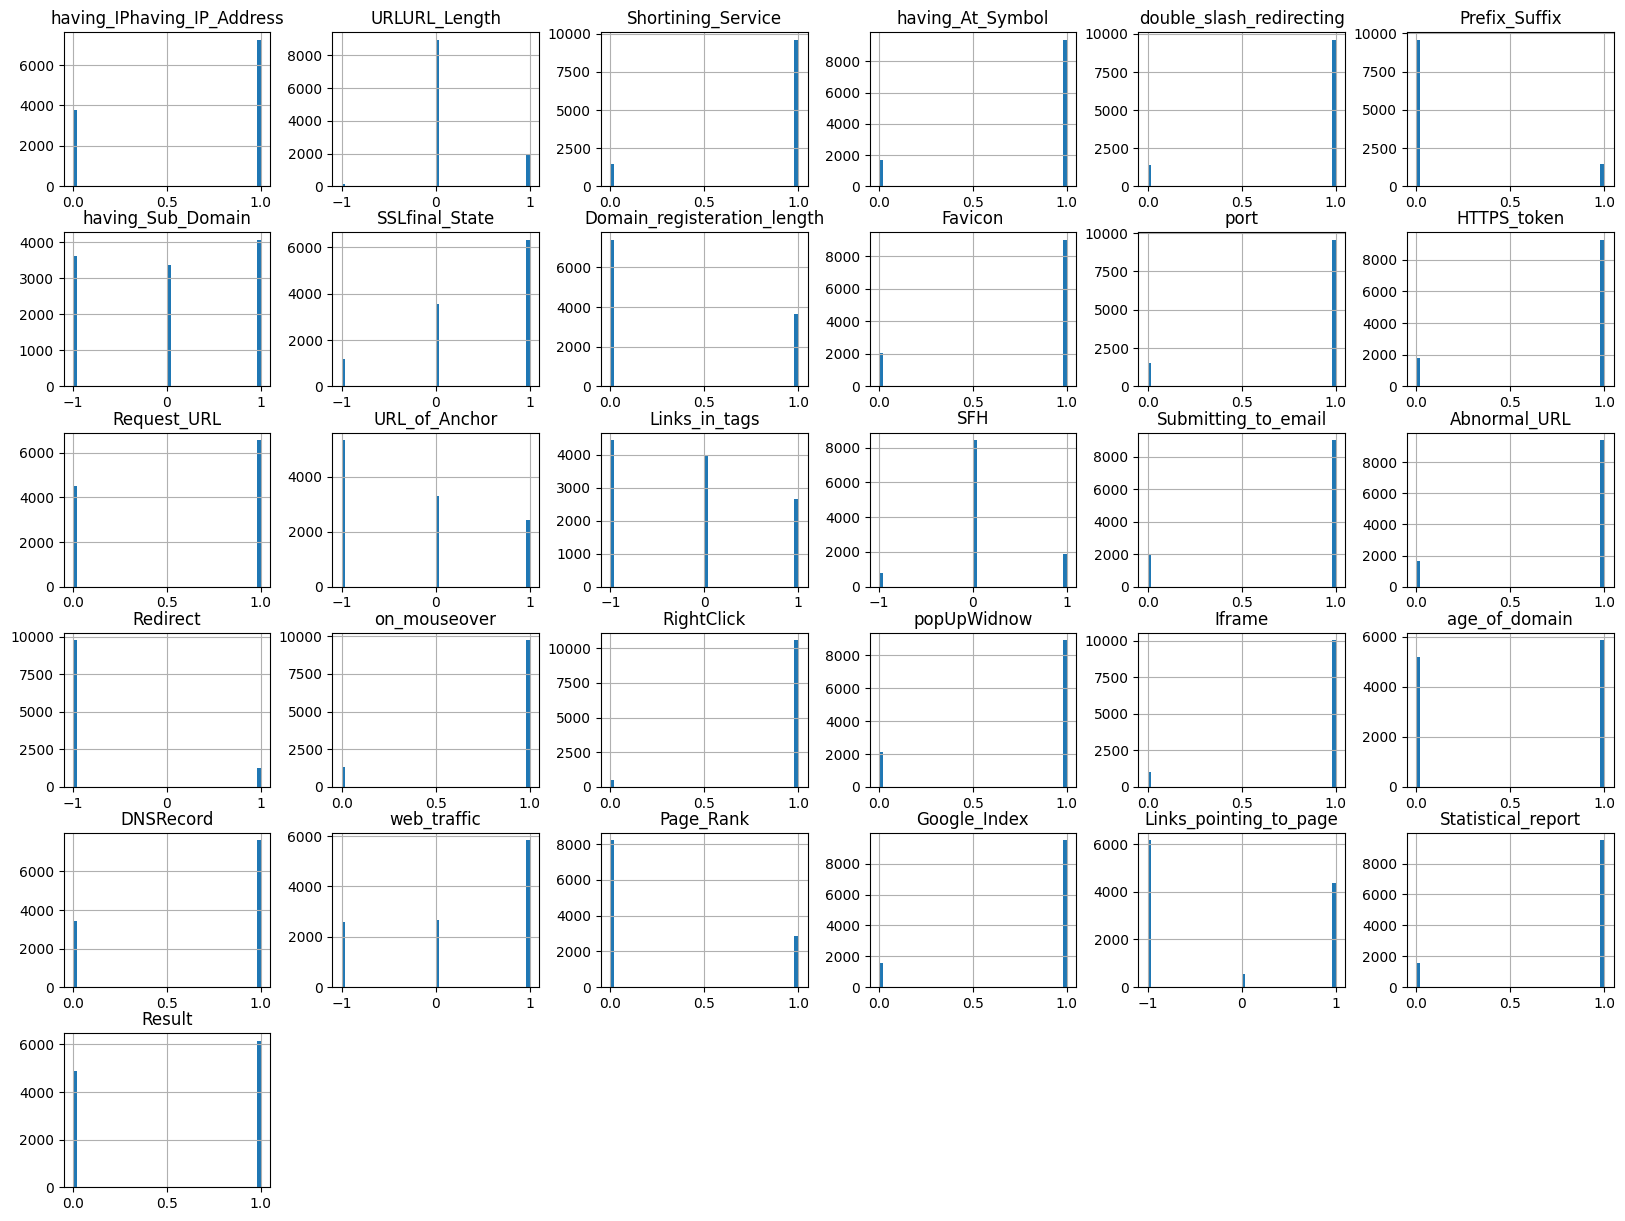

In [55]:
df_data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='Result'>

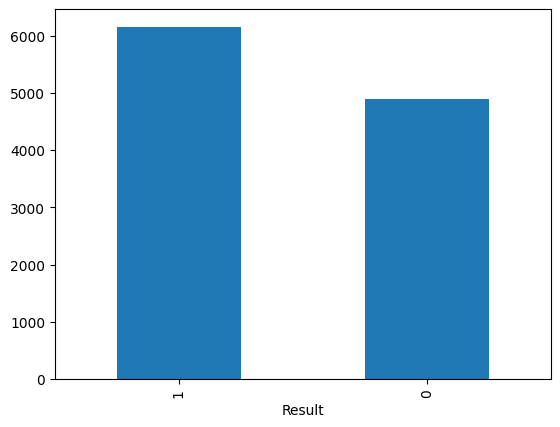

In [56]:
pd.value_counts(df_data['Result']).plot.bar()

<Axes: >

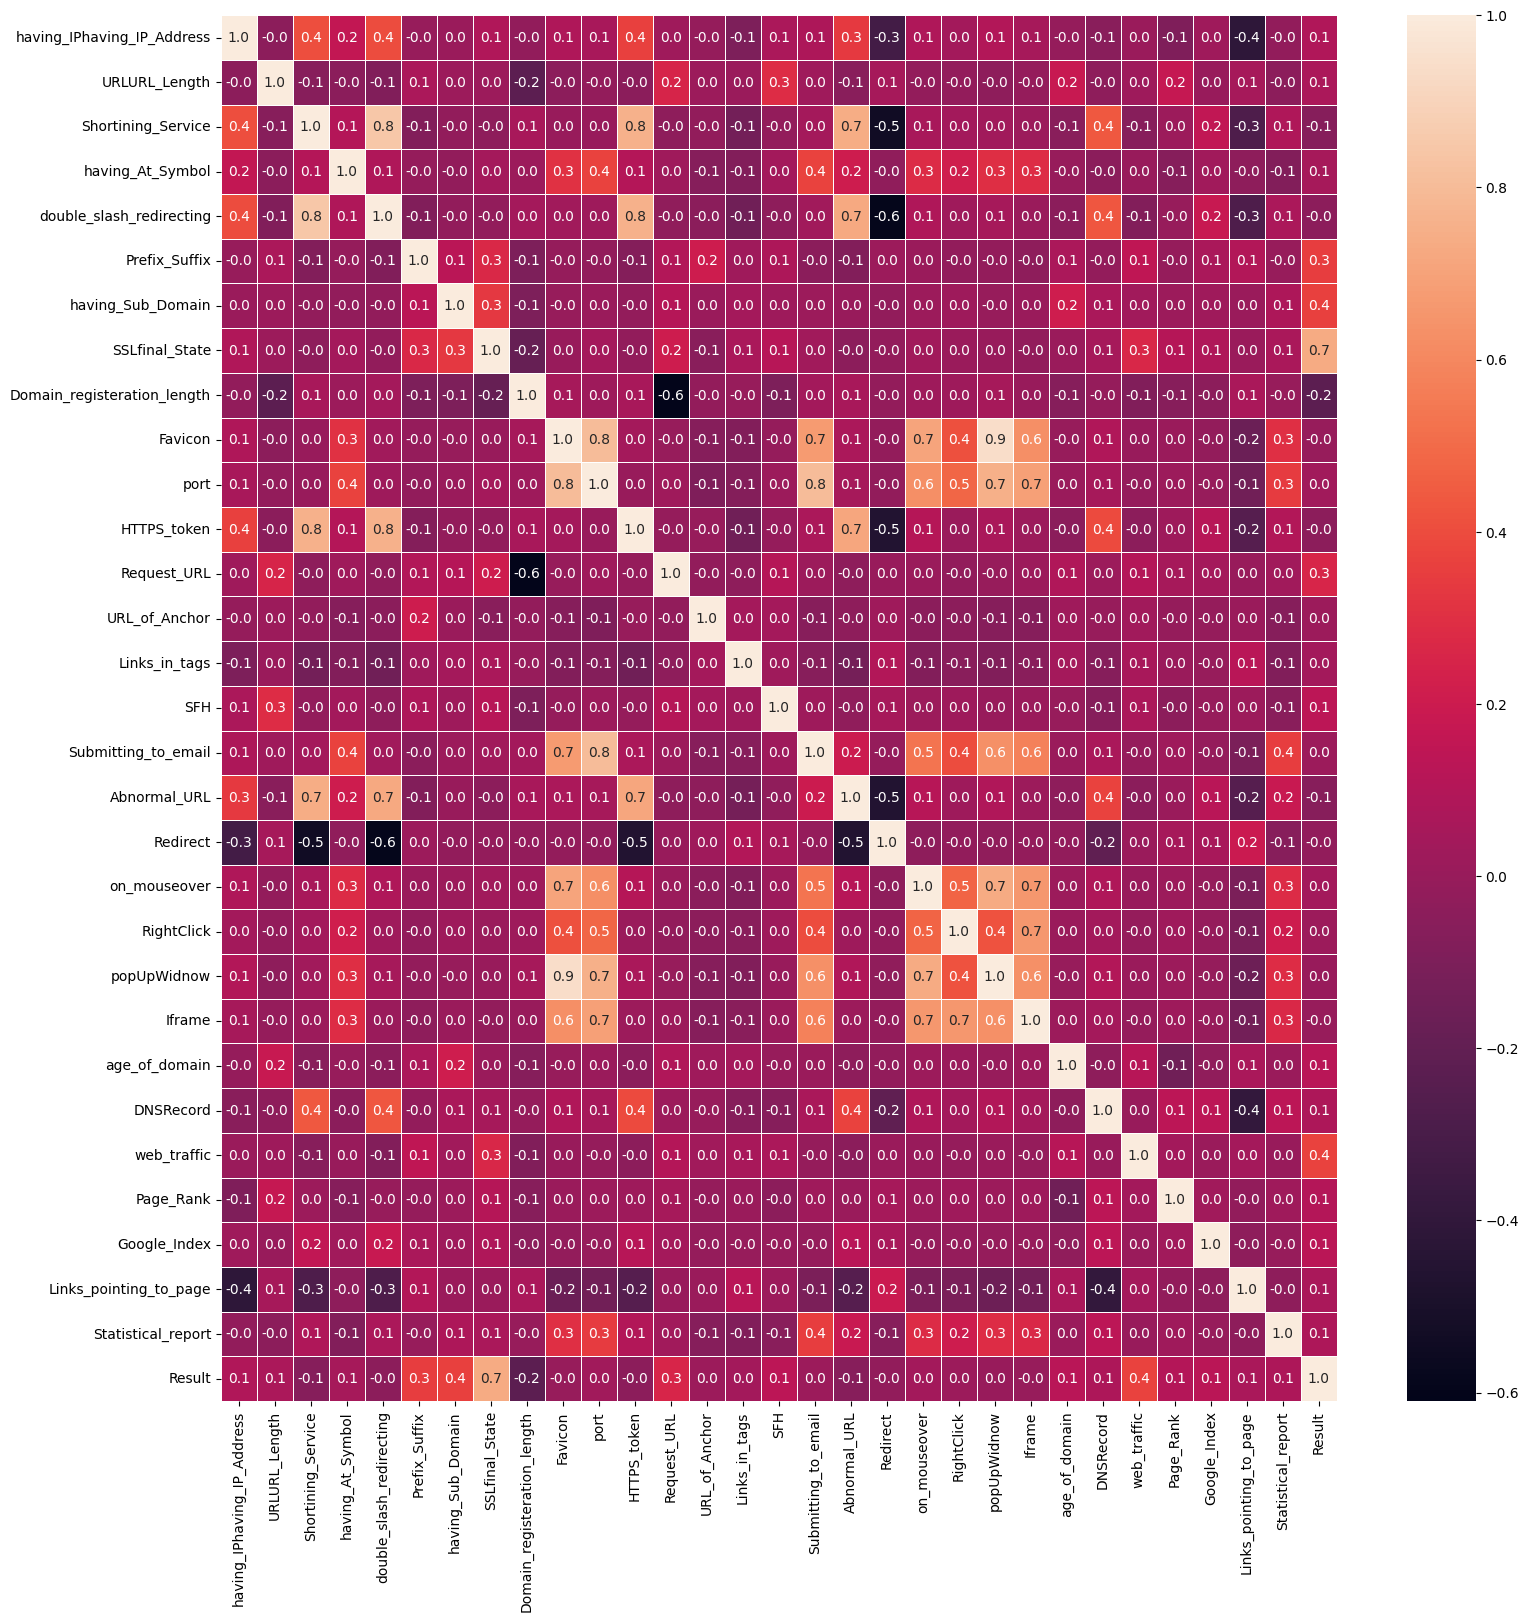

In [57]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_data.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [58]:
cor_matrix = df_data.corr().abs()
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [59]:
# threshold greater than 0.75
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['double_slash_redirecting', 'port', 'HTTPS_token', 'Submitting_to_email', 'popUpWidnow']


In [60]:
#drop the columns which are highly correlated
df_data.drop(to_drop,axis=1,inplace=True)

In [61]:
df_data.shape

(11055, 26)

In [62]:
X=df_data.drop(columns='Result')
X

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,1,1,1,0,0,0,0,1,1,...,1,1,1,0,0,0,0,1,1,0
1,1,1,1,1,0,-1,1,0,1,1,...,1,1,1,0,0,-1,0,1,1,1
2,1,-1,1,1,0,0,0,0,1,1,...,1,1,1,1,0,1,0,1,-1,0
3,1,-1,1,1,0,0,0,1,1,0,...,1,1,1,0,0,1,0,1,0,1
4,1,-1,0,1,0,1,1,0,1,1,...,0,1,1,0,0,-1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,0,1,0,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,1,1
11051,0,1,1,0,0,1,0,0,0,1,...,0,1,1,1,1,1,1,1,0,1
11052,1,0,1,1,0,1,0,0,1,1,...,1,1,1,1,1,1,0,1,-1,1
11053,0,0,1,1,0,0,0,1,0,0,...,0,1,1,1,1,1,0,1,1,1


In [63]:
Y=df_data['Result']
Y= pd.DataFrame(Y)
Y.head()

,Result
0,0
1,0
2,0
3,0
4,1


In [64]:
# split train - test to 70-30
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3, random_state=9)

In [65]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7738, 25)
(7738, 1)
(3317, 25)
(3317, 1)


In [66]:
#model build for different binary classification and show confusion matrix

def build_model(model_name,train_X, train_Y, test_X, test_Y):
    if model_name == 'LogisticRegression':
        model=LogisticRegression()
    elif model_name =='KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc')
    else:
        print('not a valid model name')

    model=model.fit(train_X,train_Y)

    pred_prob=model.predict_proba(test_X)

    fpr, tpr, thresh = roc_curve(test_Y, pred_prob[:,1], pos_label=1)

    model_predict= model.predict(test_X)
    acc=accuracy_score(model_predict,test_Y)
    print("Accuracy: ",acc)

    # Classification report
    print("Classification Report: ")
    print(classification_report(model_predict,test_Y))
    #print("Confusion Matrix for", model_name)
    con =  confusion_matrix(model_predict,test_Y)
    sns.heatmap(con,annot=True, fmt ='.2f')
    plt.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=25)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()
    return model, acc, fpr, tpr, thresh

Accuracy:  0.9092553512209828
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1477
           1       0.92      0.92      0.92      1840

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



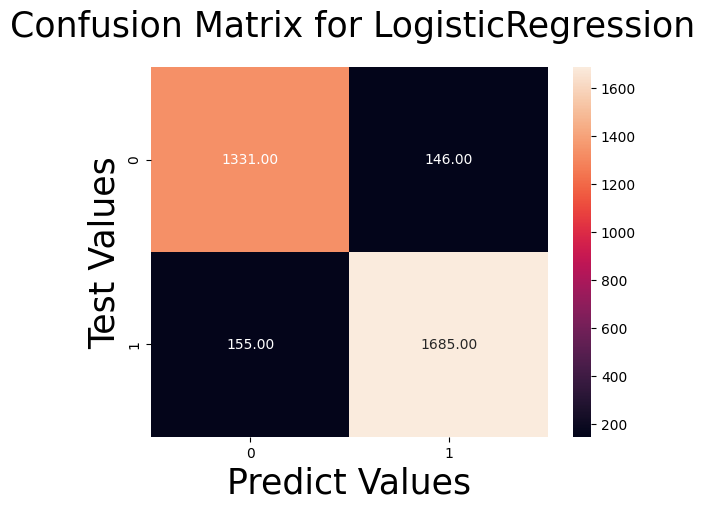

In [67]:
#Model 1 - LogisticRegression
lg_model,acc1, fpr1, tpr1, thresh1 = build_model('LogisticRegression',train_X, train_Y, test_X, test_Y.values.ravel())

Accuracy:  0.9505577328911667
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1546
           1       0.94      0.97      0.95      1771

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



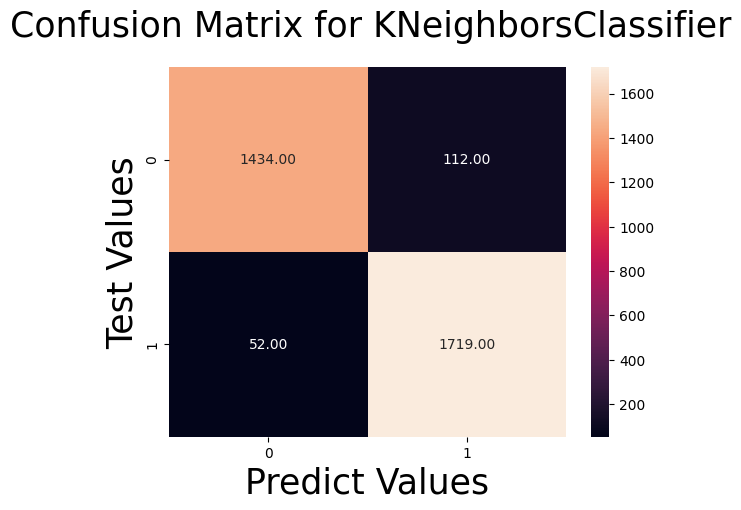

In [68]:
# Model 2 - KNeighborsClassifier
knn_model,acc2, fpr2, tpr2, thresh2 = build_model('KNeighborsClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

Accuracy:  0.9683448899608079
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1473
           1       0.97      0.97      0.97      1844

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



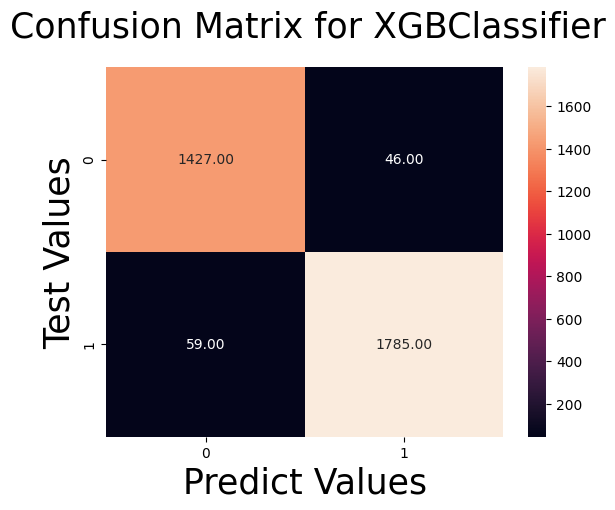

In [69]:
# Model 3 - XGBClassifier
xgb_model, acc3, fpr3, tpr3, thresh3 = build_model('XGBClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

In [70]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(test_Y))]
p_fpr, p_tpr, _ = roc_curve(test_Y, random_probs, pos_label=1)

In [71]:
!pip install seaborn

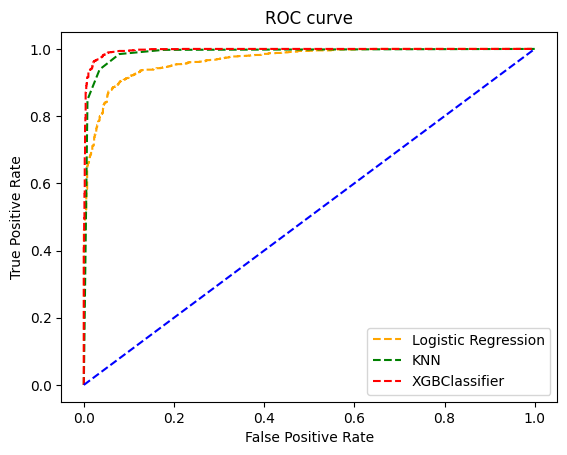

In [72]:
import seaborn as sns  # Import seaborn to enable its default styling

# Plot code
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--', color='red', label='XGBClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# Title and labels
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()


In [73]:
import warnings
warnings.filterwarnings("ignore")

# Create the parameter grid based on the results of random search
param_grid = {
    'solver':['liblinear','newton-cg'],
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = LogisticRegression() , param_grid = param_grid,
cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = 'accuracy' )

grid_search.fit(train_X,train_Y.values.ravel())

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [74]:
print('Best Parameter:')
print('F1 Score:', grid_search.best_score_)
print('Best Hyperparameters:', grid_search.best_params_)
print('Model object with best parameters:')
print(grid_search.best_estimator_)

Best Parameter:
F1 Score: 0.9119919888624345
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Model object with best parameters:
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [75]:
grid_params = {
    'n_neighbors':[3,4,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs= GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose=1,
cv=3,
n_jobs=-1
)
gs_results = gs.fit(train_X,train_Y.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [76]:
print('Best Parameter:')
print('F1 Score:', gs_results.best_score_)
print('Best Hyperparameters:', gs_results.best_params_)
print('Model object with best parameters:')
print(gs_results.best_estimator_)
!pip install --upgrade xgboost scikit-learn


Best Parameter:
F1 Score: 0.9577408165534987
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Model object with best parameters:
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [77]:
xgb_cv = XGBClassifier(n_estimators=100,objective='binary:logistic',eval_metric='auc')
scores = cross_val_score(xgb_cv, train_X, train_Y.values.ravel(), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95994832 0.97416021 0.95090439 0.98320413 0.95090439 0.96770026
 0.96899225 0.97416021 0.95989651 0.9702458 ]
Mean: 0.9660116462923407
Standard Deviation: 0.009943139365965624


In [78]:
results=pd.DataFrame({'Model':['LogisticRegression','KNN','XGBoost'],
                     'Accuracy Score':[acc1,acc2,acc3]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
XGBoost,0.968345
KNN,0.950558
LogisticRegression,0.909255


In [79]:
import pickle
best_model = max([(lg_model, acc1), (knn_model, acc2), (xgb_model, acc3)], key=lambda x: x[1])[0]

# Save the best model
with open('classifier.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved successfully!")

# Print the type of model
print(type(best_model))

Best model saved successfully!
<class 'xgboost.sklearn.XGBClassifier'>


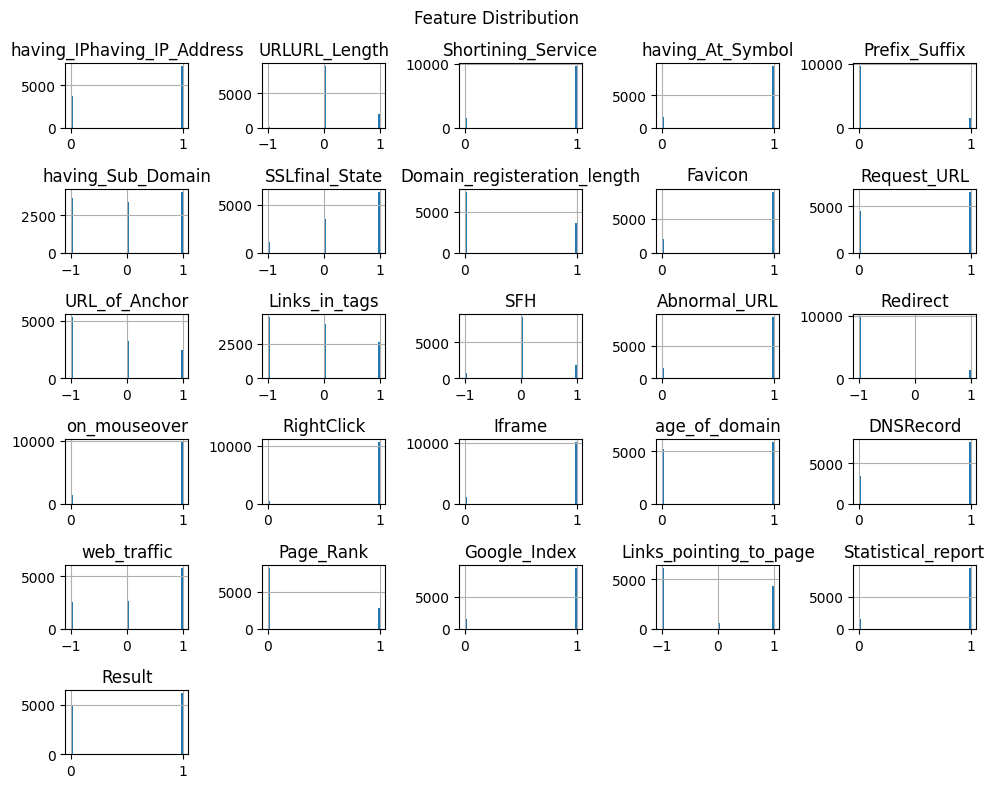

In [80]:
# Plotting histogram to visualize the distribution of the target variable and features
df_data.hist(bins=50, figsize=(10,8))  # Smaller figure size for a more compact image
plt.suptitle('Feature Distribution')
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()



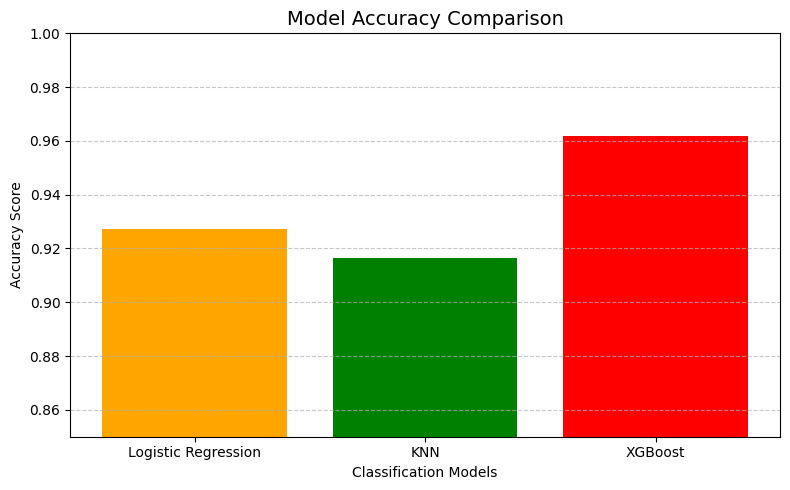

In [81]:
import matplotlib.pyplot as plt

# Accuracy values
model_names = ['Logistic Regression', 'KNN', 'XGBoost']
accuracies = [0.92727, 0.91636, 0.96182]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['orange', 'green', 'red'])
plt.ylim([0.85, 1.0])  # Adjusted for better visual focus
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy Score')
plt.xlabel('Classification Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=300)
plt.show()


<Figure size 1000x800 with 0 Axes>

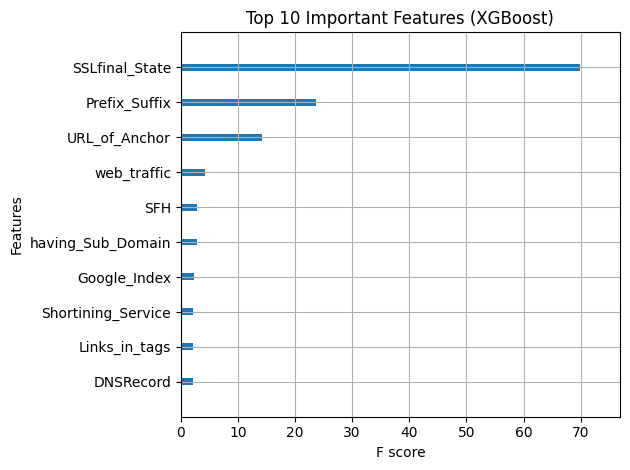

In [82]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming xgb_model is your trained XGBoost model
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type='gain', show_values=False)
plt.title('Top 10 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


In [84]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming y_test and y_pred_xgb are available
report_dict = classification_report(test_Y, y_pred_xgb, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("XGBoost Classification Report Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Labels")
plt.tight_layout()
plt.show()


NameError: name 'y_pred_xgb' is not defined